In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn # nn contains all of PyTorch's building block for neural networks

In [2]:
what_we_are_covering = {
    1: "data (prepare and load",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

## Data - preparing and loading
**Get data into numerical representation.**

In [18]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

## Train/test split

In [19]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

In [20]:
def plot_predictions(train_data, train_label, test_data, test_labels, predictions=None):
    """
    Plots trainging data, test data and compares predictions.
    """
    plt.figure(figsize=(9, 6))
    
    plt.scatter(train_data, train_label, c="b", s=5, label="Traing data")

    plt.scatter(test_data, test_labels, c="r", s=5, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=5, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()

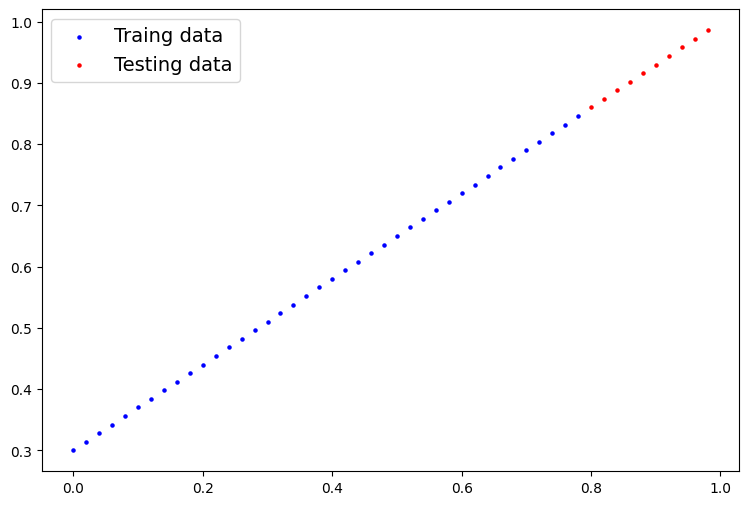

In [21]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building model

In [53]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                dtype=torch.float,
                                                requires_grad=True))
                                               
        self.bias = nn.Parameter(torch.randn(1, 
                                                dtype=torch.float,
                                                requires_grad=True))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

## Checking the contents of my PyTorch model

In [54]:
torch.manual_seed(0)

model_0 = LinearRegressionModel()

In [55]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True),
 Parameter containing:
 tensor([-0.2934], requires_grad=True)]

In [56]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

## Making predictions with my model

In [57]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.9394],
        [0.9702],
        [1.0010],
        [1.0318],
        [1.0626],
        [1.0935],
        [1.1243],
        [1.1551],
        [1.1859],
        [1.2167]])

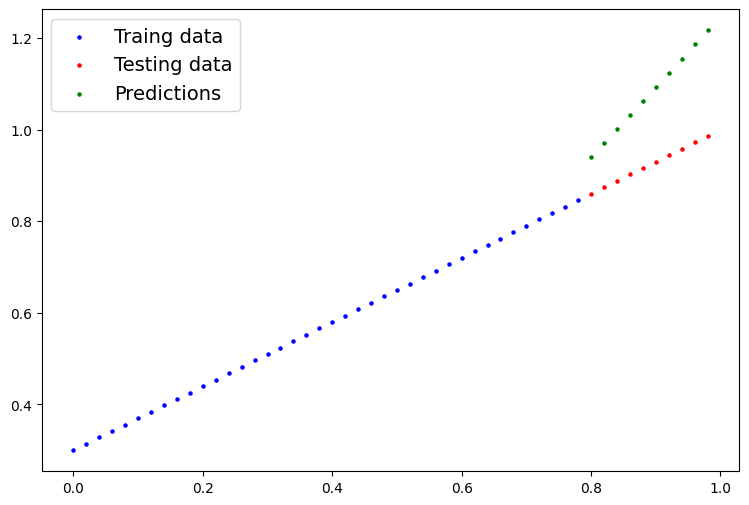

In [58]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

## Train mode

In [59]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

In [60]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [69]:
# An epoch is one loop through the data...
epochs = 1000

# 0. Loop through the data
for epoch in range(epochs):
    # set the model tor training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to requires_grad=True

    # 1. Forward pass (propagation)
    y_pred = model_0(X_train)

    # 2. Calculate the loss (in the current case L1 - Mean Absolute Error (MAE))
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation  on the loss  with repect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform  gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration of the loop

    #model_0.eval() # turns off gradient tracking
    

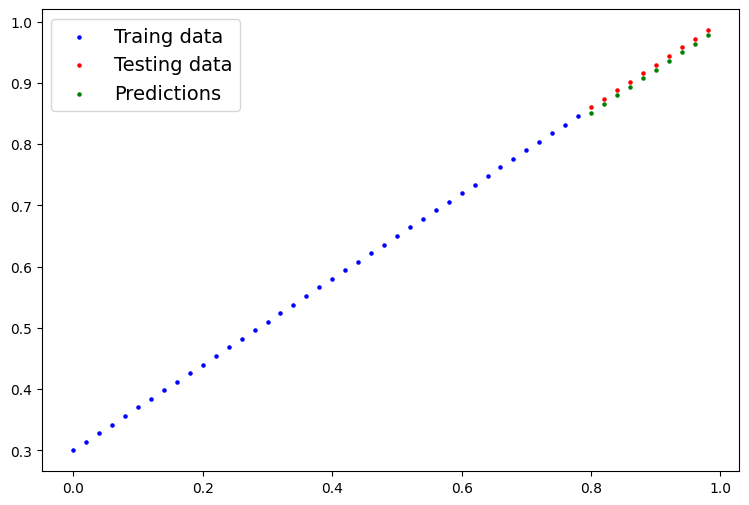

In [70]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)